In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
sns.set_context("talk")

def lowpass(data, window = 20): 
    out = []
    for idx, el in enumerate(data):  
        if (idx + window) <= len(data): 
            out.append(sum(data[idx:idx + window]) / window)
        else: 
            out.append(sum(data[idx:-(idx + window - len(data))]) / window)
    return out


Erdős–Rényi
	fixedp_mean = 2.23289452684301e-06
	fixedp_variance = 2.0873424320896213e-12
Erdős–Rényi
	fp_mean = 7.362363999999957e-10
	fp_variance = 1.0865929913150232e-18
gnp done
Small World
	fixedp_mean = 2.2506104408665667e-09
	fixedp_variance = 3.4799962848665056e-18
Small World
	fp_mean = 2.2507986000000026e-09
	fp_variance = 3.480912666238026e-18
smw done
Scale Free
	fixedp_mean = 7.258905558451262e-10
	fixedp_variance = 1.0628939992158568e-18
Scale Free
	fp_mean = 7.259192999999946e-10
	fp_variance = 1.0636288788874971e-18
scf done



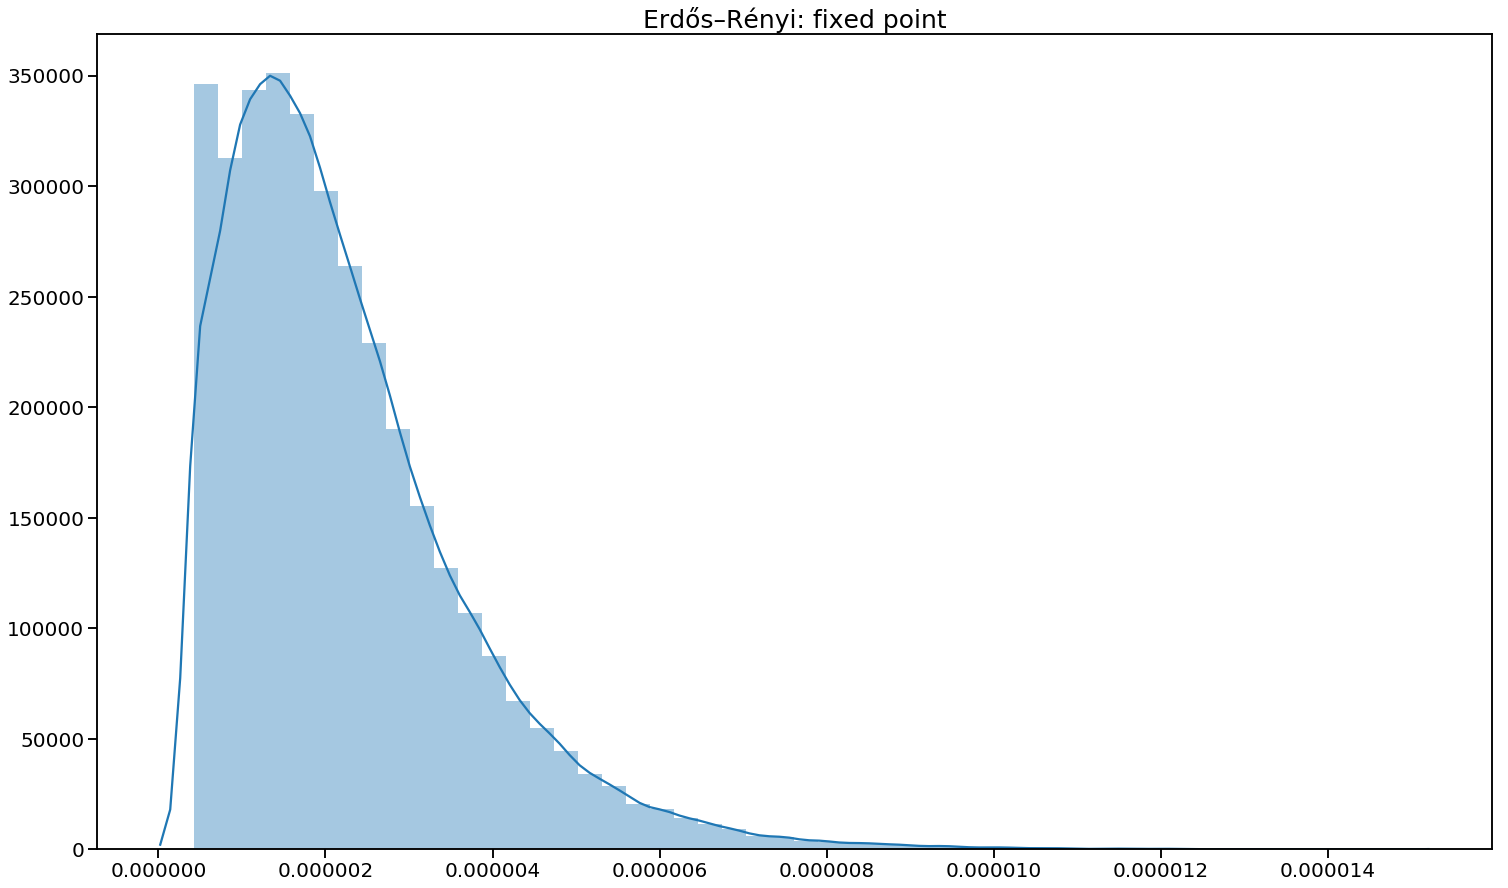

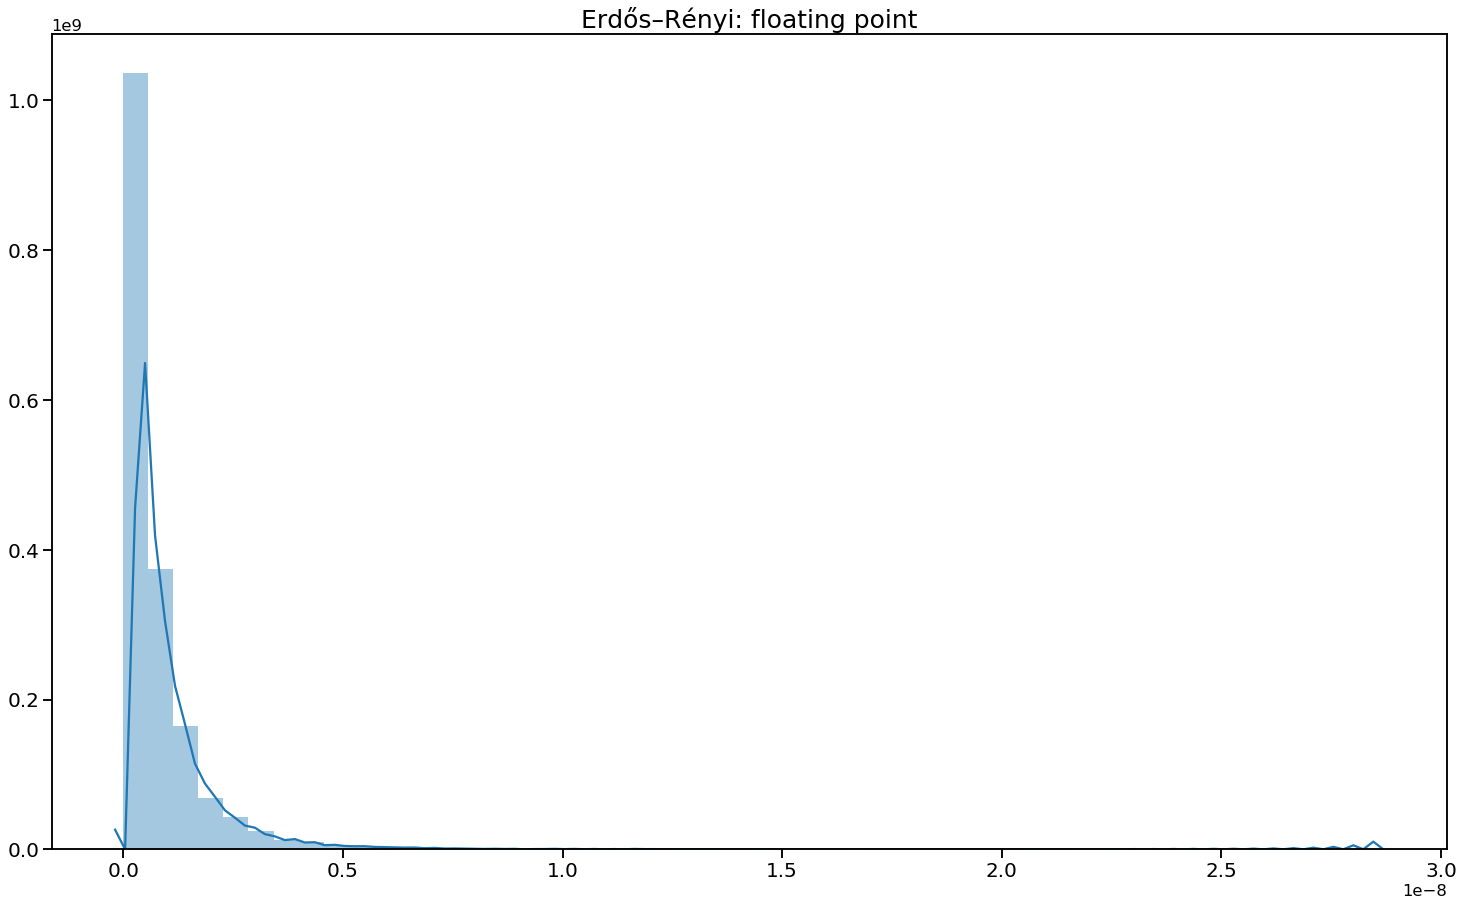

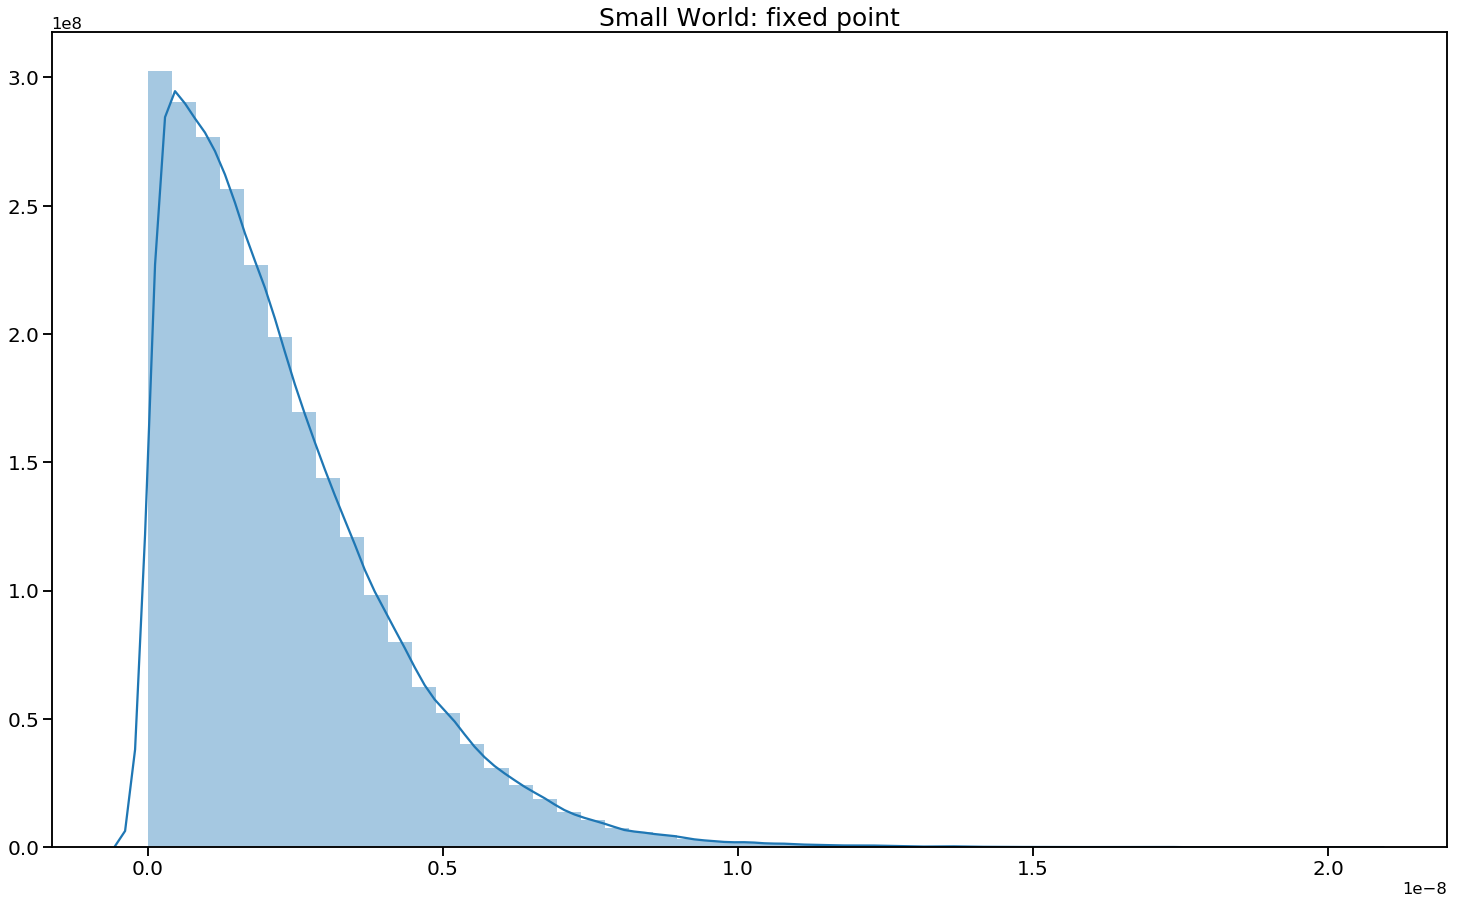

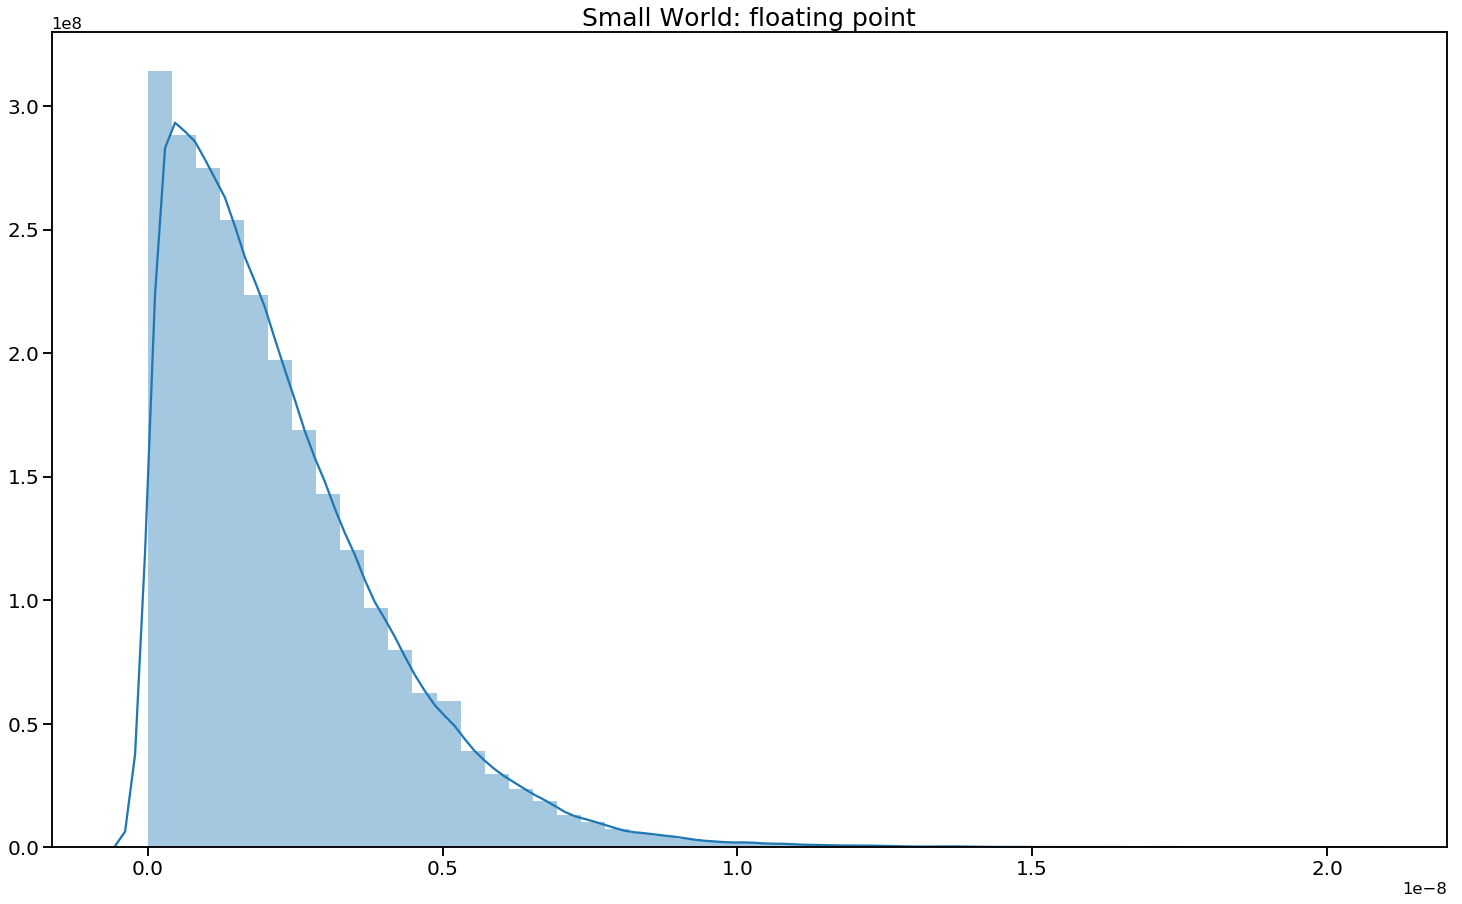

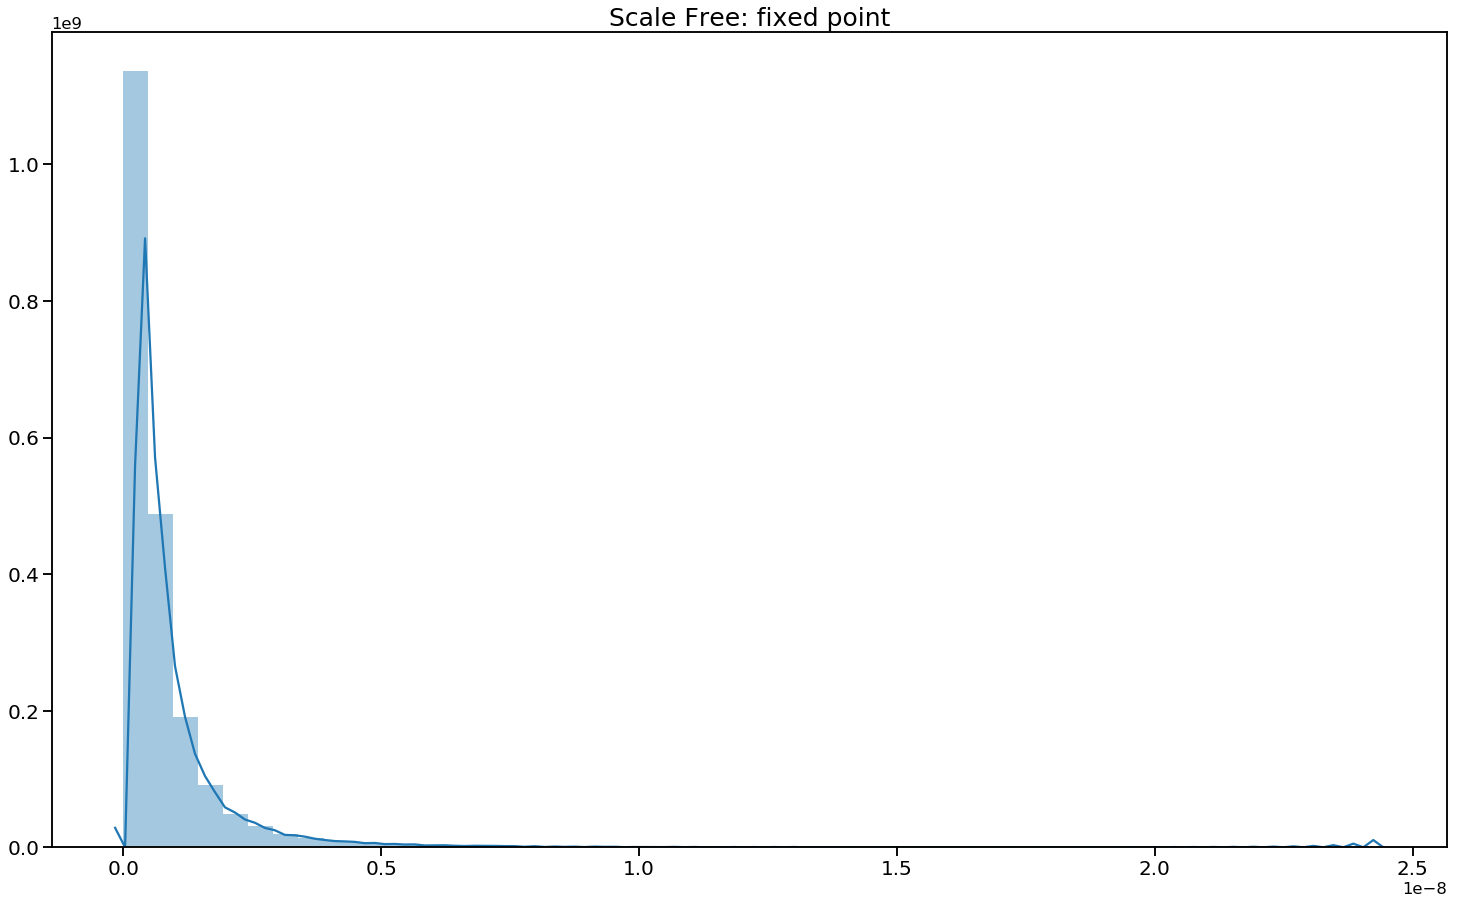

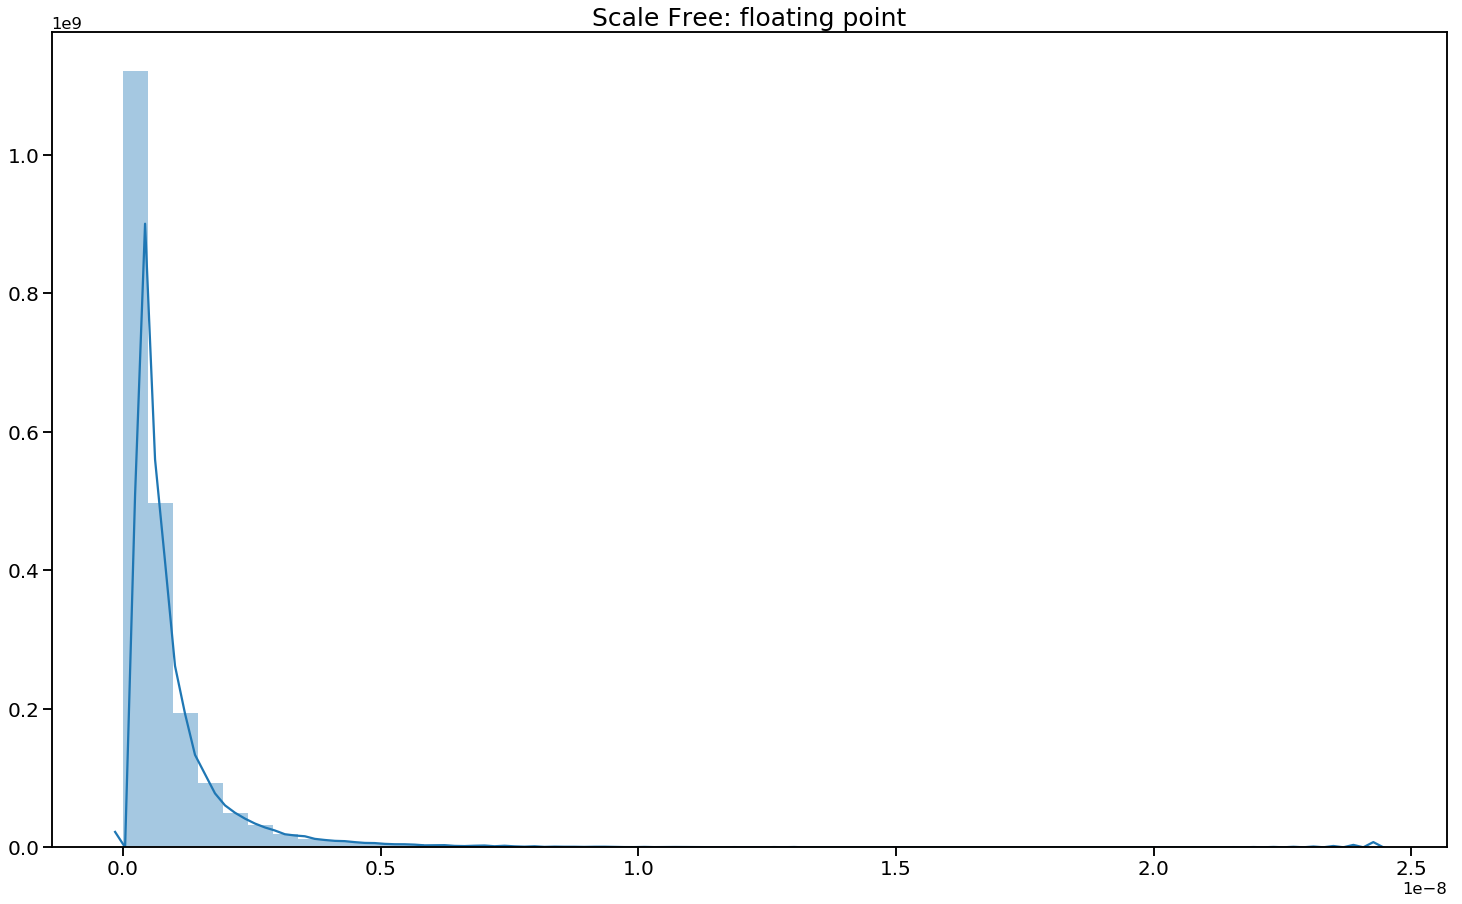

In [58]:
for graph in tqdm_notebook(["gnp", "smw", "scf"]): 
    fixed = {}
    floating = {}
    real = {}
    name_map = {
        "gnp": "Erdős–Rényi", 
        "smw": "Small World", 
        "scf": "Scale Free"
    }
    with open(f"../new_ds/measurements/{graph}/fixed/displacement") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            fixed[key] = int(value) / (1 << 63)

    with open(f"../new_ds/measurements/{graph}/floating/displacement") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            floating[key] = float(value)
    
    with open(f"../new_ds/measurements/{graph}/parra/{graph}_eff") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            real[key] = float(value)
            
    offset_fixed = []
    offset_floating = []
    for idx, val in fixed.items():
        real_val = real[idx]
        offset_fixed.append(abs(real_val - val))
    print(f"{name_map[graph]}\n\tfixedp_mean = {np.mean(offset_fixed)}\n\tfixedp_variance = {np.var(offset_fixed)}")
    
    for idx, val in floating.items(): 
        real_val = real[idx]
        offset_floating.append(abs(real_val - val))

    offset_fixed_lp    = lowpass(offset_fixed, window=1000)
    offset_floating_lp = lowpass(offset_floating, window=1000)
    
    print(f"{name_map[graph]}\n\tfp_mean = {np.mean(offset_floating)}\n\tfp_variance = {np.var(offset_floating)}")
    
    plt.figure(figsize=(25, 15))
    ax = sns.distplot(offset_fixed, kde=True)
    ax.axes.set_title(f"{name_map[graph]}: fixed point", fontsize=25)  
    #plt.xlim((min(offset_fixed), 2 / 3 * max(offset_fixed)))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
    plt.savefig(f'figures/pagerank_displ/{graph}_fixed_dist.png')
    
    
    plt.figure(figsize=(25, 15))
    ax = sns.distplot(offset_floating, kde=True)
    ax.axes.set_title(f"{name_map[graph]}: floating point", fontsize=25)  
    #plt.xlim((min(offset_floating), 2 / 3 * max(offset_floating)))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20)
    plt.savefig(f'figures/pagerank_displ/{graph}_floating_dist.png')
    
     
    
    print(graph, "done")
    
    

gnp done
smw done
scf done



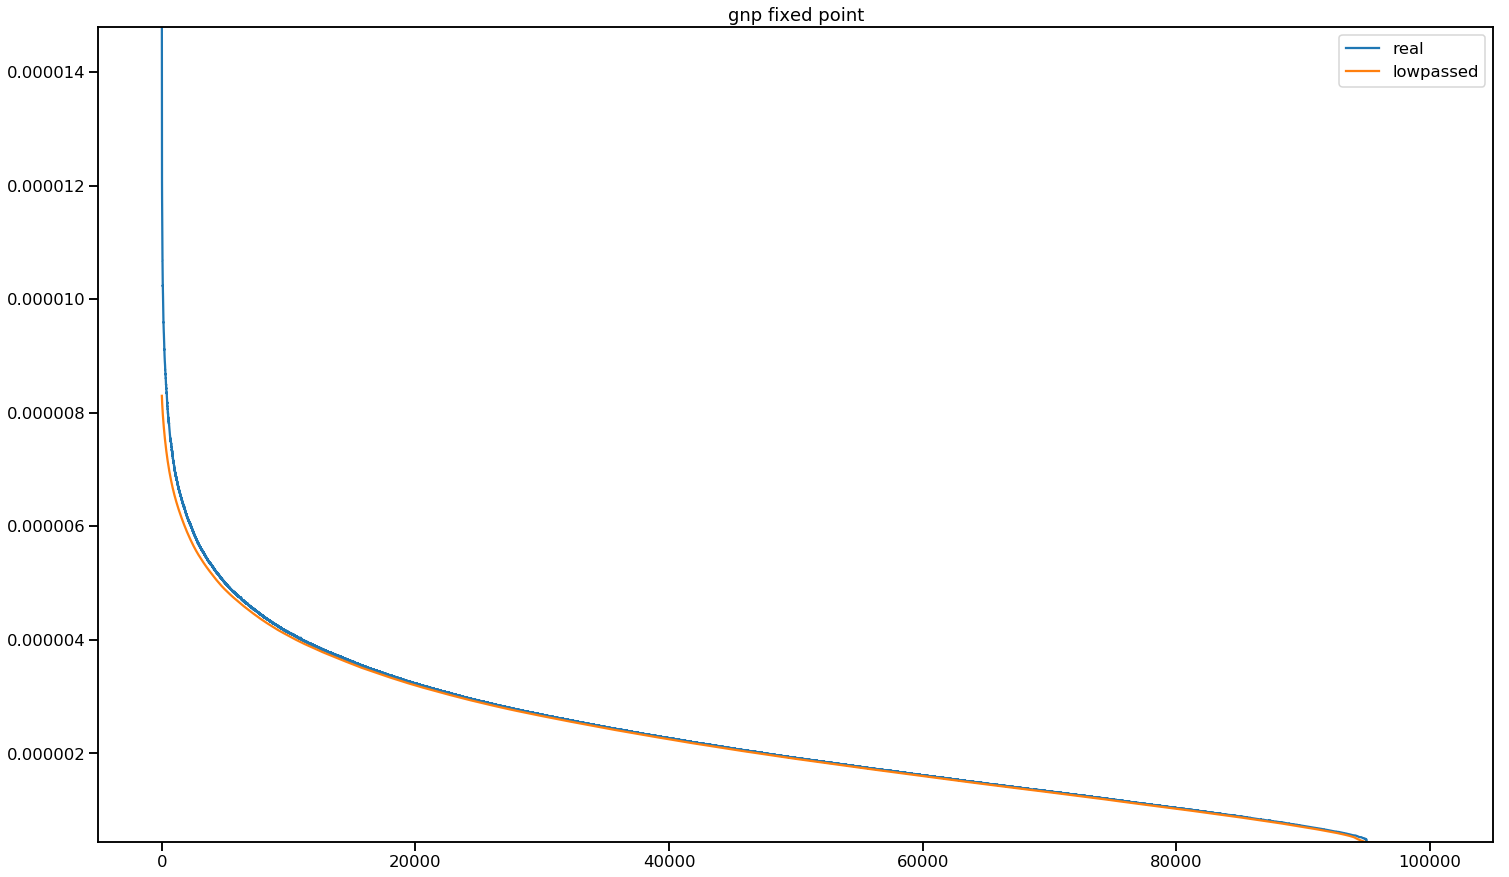

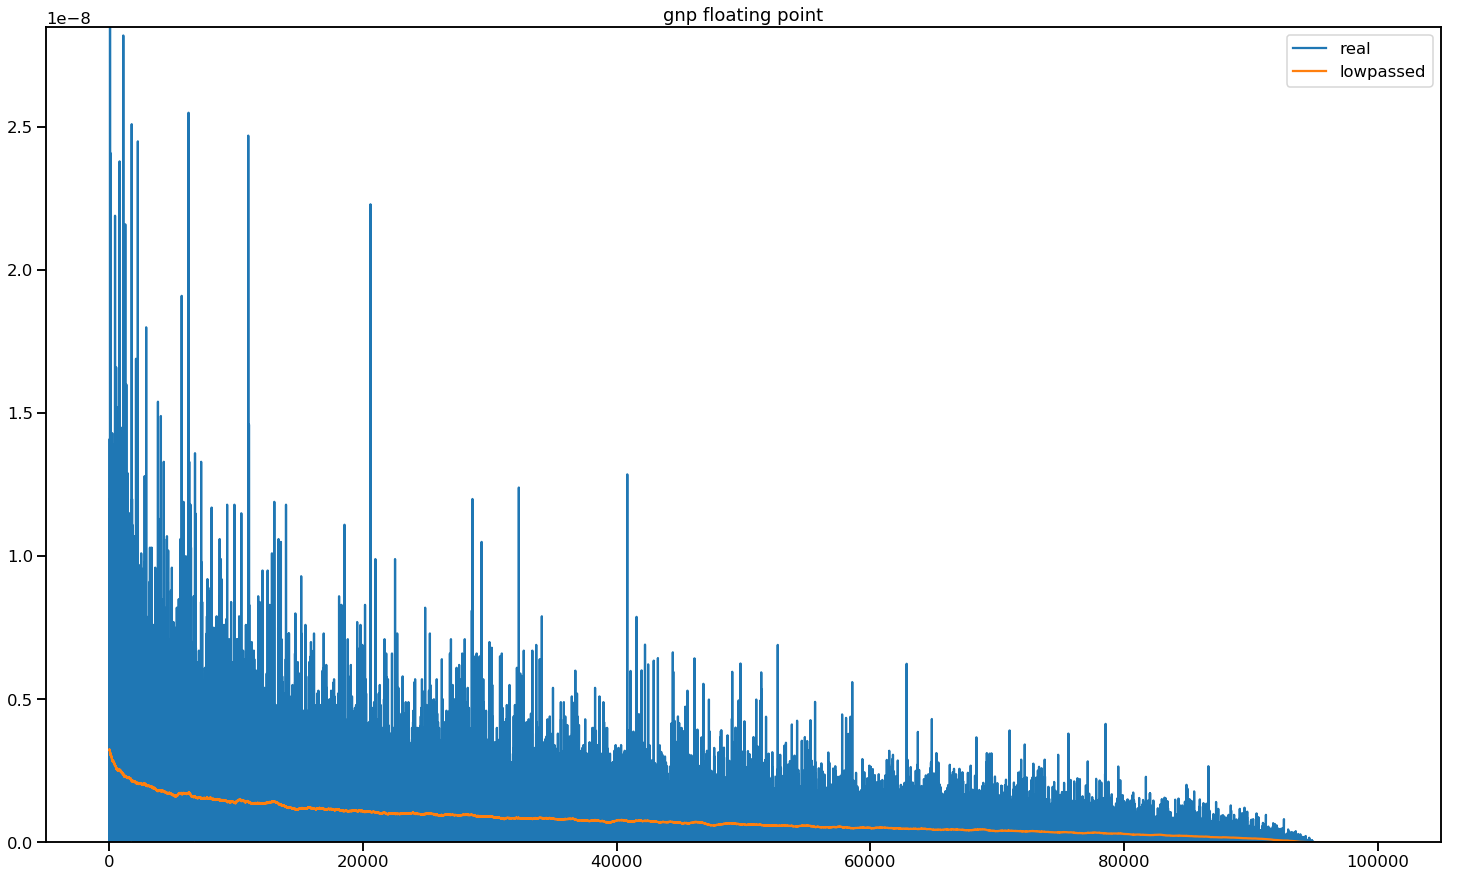

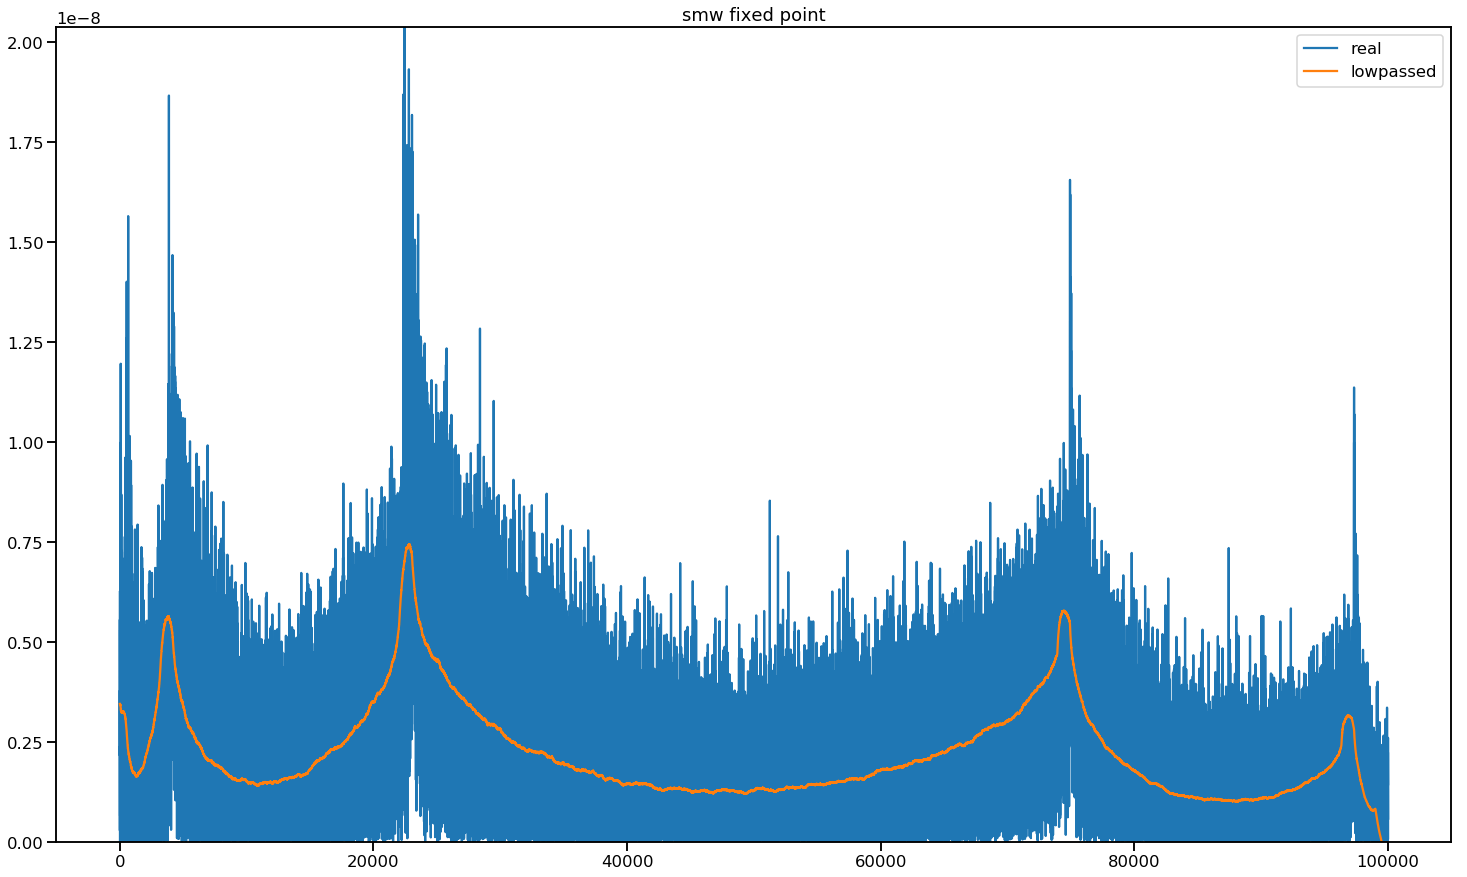

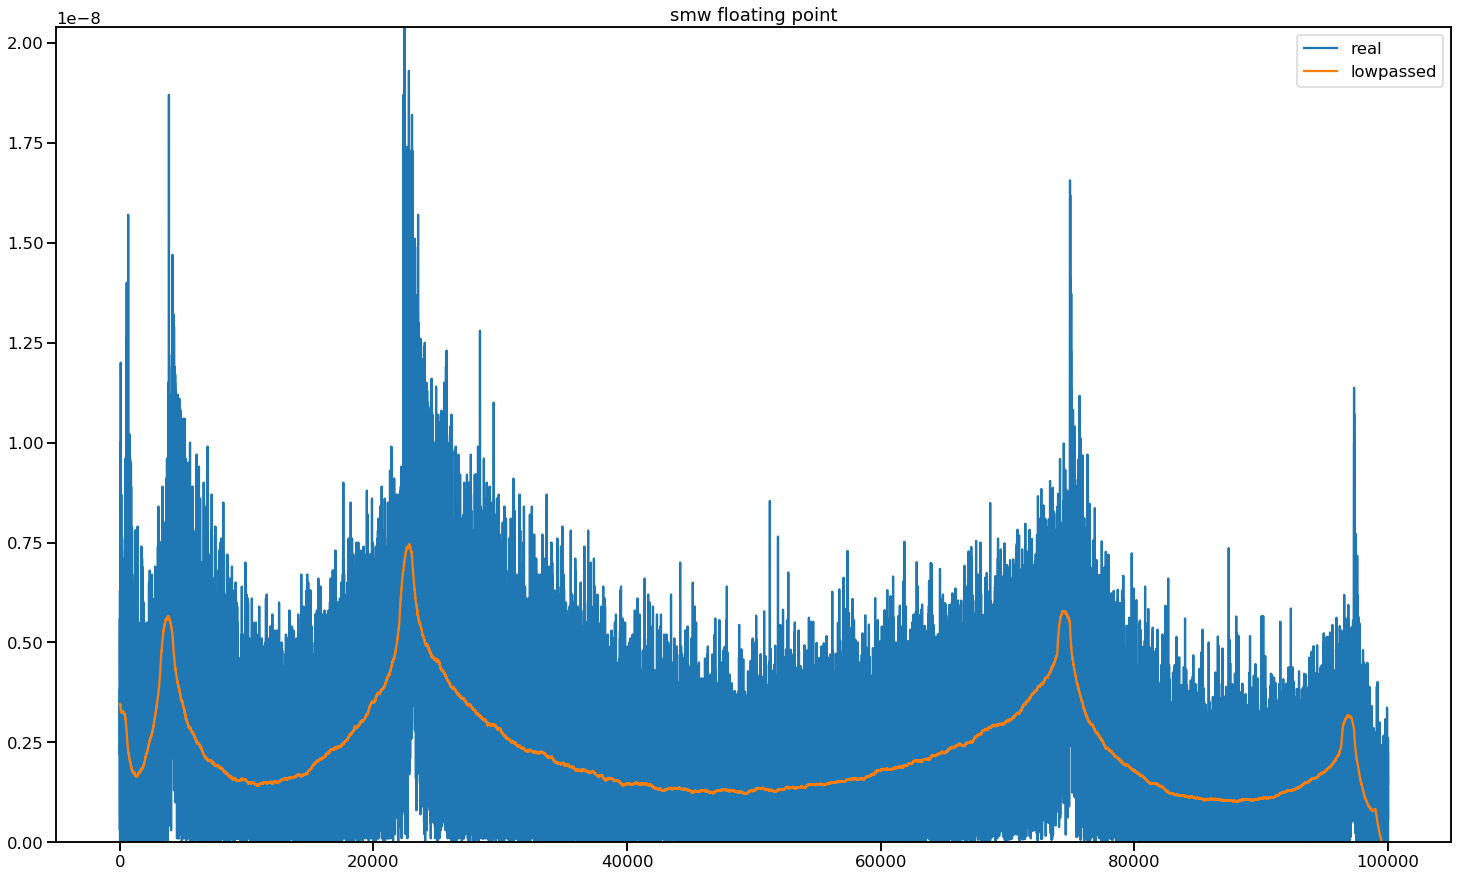

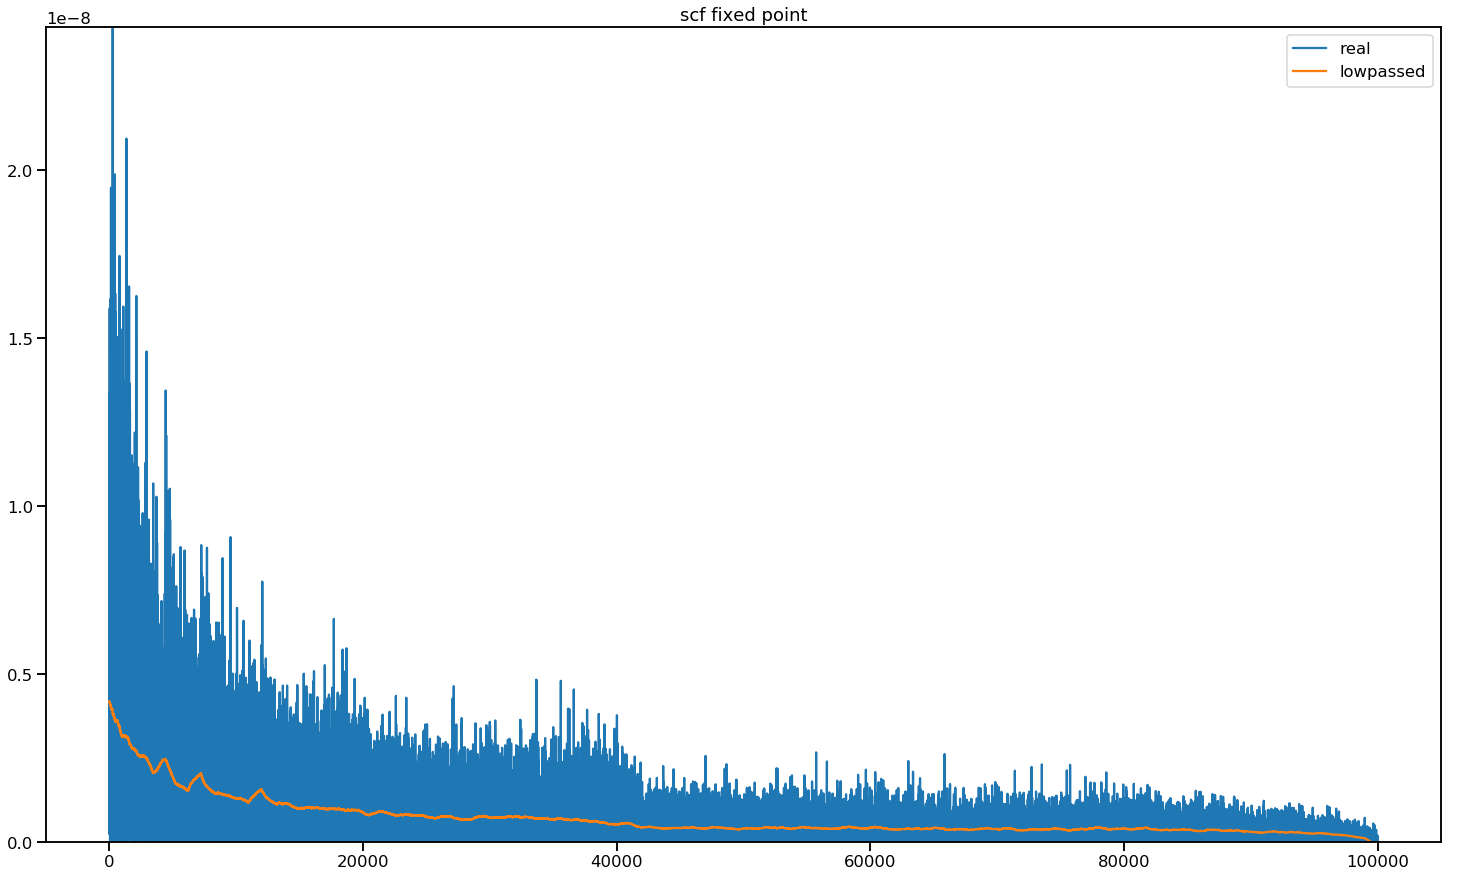

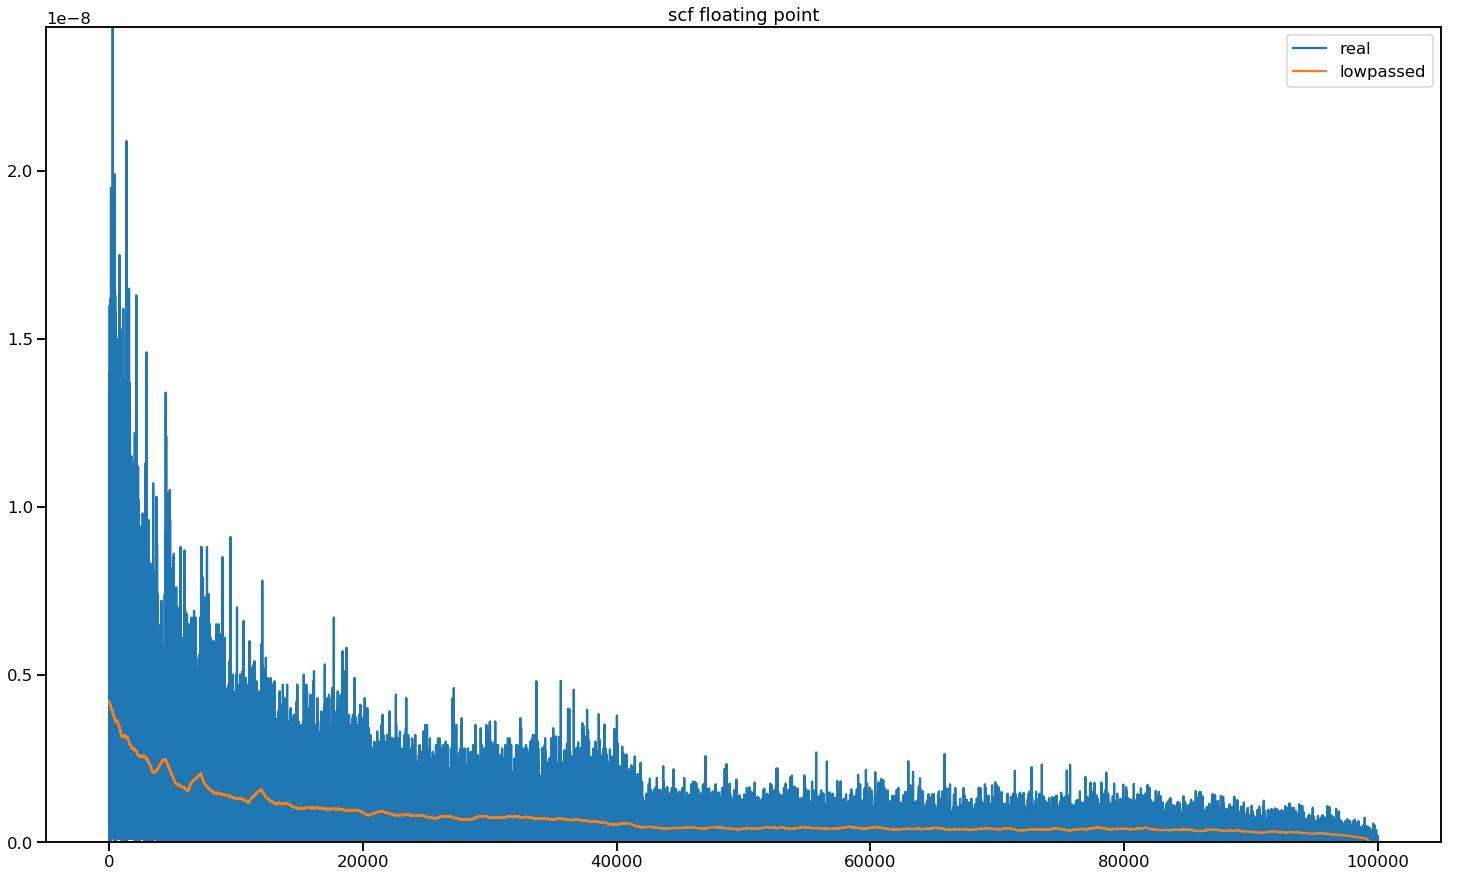

In [59]:
for graph in tqdm_notebook(["gnp", "smw", "scf"]): 
    fixed = {}
    floating = {}
    real = {}
    
    with open(f"../new_ds/measurements/{graph}/fixed/displacement") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            fixed[key] = int(value) / (1 << 63)

    with open(f"../new_ds/measurements/{graph}/floating/displacement") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            floating[key] = float(value)
    
    with open(f"../new_ds/measurements/{graph}/parra/{graph}_eff") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            real[key] = float(value)
            
    offset_fixed = []
    offset_floating = []
    for idx, val in fixed.items():
        real_val = real[idx]
        offset_fixed.append(abs(real_val - val))
    
    for idx, val in floating.items(): 
        real_val = real[idx]
        offset_floating.append(abs(real_val - val))

    offset_fixed_lp    = lowpass(offset_fixed, window=1000)
    offset_floating_lp = lowpass(offset_floating, window=1000)
    
    plt.figure(figsize=(25, 15))
    ax = sns.lineplot(x=list(range(len(offset_fixed))), y=offset_fixed, label="real")
    ax.set(title=f"{graph} fixed point")
    sns.lineplot(x=list(range(len(offset_fixed))), y=offset_fixed_lp, ax=ax,  label="lowpassed", legend="brief", ci="sd")
    plt.ylim((min(offset_fixed), max(offset_fixed)))
    
    plt.savefig(f'figures/pagerank_displ/{graph}_fixed.png')
    
    plt.figure(figsize=(25, 15))    
    ax = sns.lineplot(x=list(range(len(offset_floating))), y=offset_floating, label="real")
    ax.set(title=f"{graph} floating point")
    sns.lineplot(x=list(range(len(offset_floating))), y=offset_floating_lp, ax=ax,  label="lowpassed", legend="brief",  ci="sd")
    plt.ylim((min(offset_floating), max(offset_floating)))
    
    plt.savefig(f'figures/pagerank_displ/{graph}_floating.png')
    print(graph, "done")
    
    